# **Transfer Learning for Image Classification**




In [1]:
from keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

### **Load Data**

In [2]:
# Defining train and validation generators
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/fruits/train',
        target_size=(image_size, image_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/fruits/test',
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 1500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


### **Simple Image Classification Model**

In [3]:
#Building up a Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [7]:
model.compile(loss='binary_crossentropy', optimizer='sgd',
              metrics=['accuracy'])
#model.fit(X_train, y_train, batch_size=32, epochs=10, 
#          verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)
# Fitting the model
model_with_aug = model.fit(
        train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10)

Epoch 1/10
30/30 [==============================] - 25s 818ms/step - loss: 0.4313 - accuracy: 0.4488 - val_loss: 0.4467 - val_accuracy: 0.3844
Epoch 2/10
30/30 [==============================] - 25s 824ms/step - loss: 0.4153 - accuracy: 0.4403 - val_loss: 0.4237 - val_accuracy: 0.4906
Epoch 3/10
30/30 [==============================] - 24s 809ms/step - loss: 0.4182 - accuracy: 0.4643 - val_loss: 0.4245 - val_accuracy: 0.4469
Epoch 4/10
30/30 [==============================] - 24s 810ms/step - loss: 0.3954 - accuracy: 0.5116 - val_loss: 0.4247 - val_accuracy: 0.4469
Epoch 5/10
30/30 [==============================] - 24s 813ms/step - loss: 0.4116 - accuracy: 0.4394 - val_loss: 0.4518 - val_accuracy: 0.4187
Epoch 6/10
30/30 [==============================] - 24s 804ms/step - loss: 0.4139 - accuracy: 0.4771 - val_loss: 0.4253 - val_accuracy: 0.4406
Epoch 7/10
30/30 [==============================] - 24s 805ms/step - loss: 0.4274 - accuracy: 0.4299 - val_loss: 0.4078 - val_accuracy: 0.4688

### **Image Classification Model using Transfer Learning**

In [8]:
# Resnet50 Model with pretrained weights
num_classes = 5

model_tl = Sequential()
model_tl.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model_tl.add(Dense(num_classes, activation='softmax'))

# Not Training RestNet50 layer to freeze the weights
model_tl.layers[0].trainable = False

model_tl.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Fitting the model
model_with_TL = model_tl.fit(
        train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10)


Epoch 1/10
30/30 [==============================] - 104s 3s/step - loss: 1.5436 - accuracy: 0.4686 - val_loss: 0.6748 - val_accuracy: 0.7563
Epoch 2/10
30/30 [==============================] - 100s 3s/step - loss: 0.7871 - accuracy: 0.6920 - val_loss: 0.4881 - val_accuracy: 0.8250
Epoch 3/10
30/30 [==============================] - 99s 3s/step - loss: 0.4590 - accuracy: 0.8315 - val_loss: 0.4712 - val_accuracy: 0.8219
Epoch 4/10
30/30 [==============================] - 100s 3s/step - loss: 0.4994 - accuracy: 0.8274 - val_loss: 0.4844 - val_accuracy: 0.8125
Epoch 5/10
30/30 [==============================] - 100s 3s/step - loss: 0.3914 - accuracy: 0.8530 - val_loss: 0.3816 - val_accuracy: 0.8500
Epoch 6/10
30/30 [==============================] - 100s 3s/step - loss: 0.3881 - accuracy: 0.8725 - val_loss: 0.3499 - val_accuracy: 0.8719
Epoch 7/10
30/30 [==============================] - 99s 3s/step - loss: 0.2824 - accuracy: 0.9159 - val_loss: 0.3246 - val_accuracy: 0.8844
Epoch 8/10
30/3

### **Plotting Loss and Accuracy** **bold text**

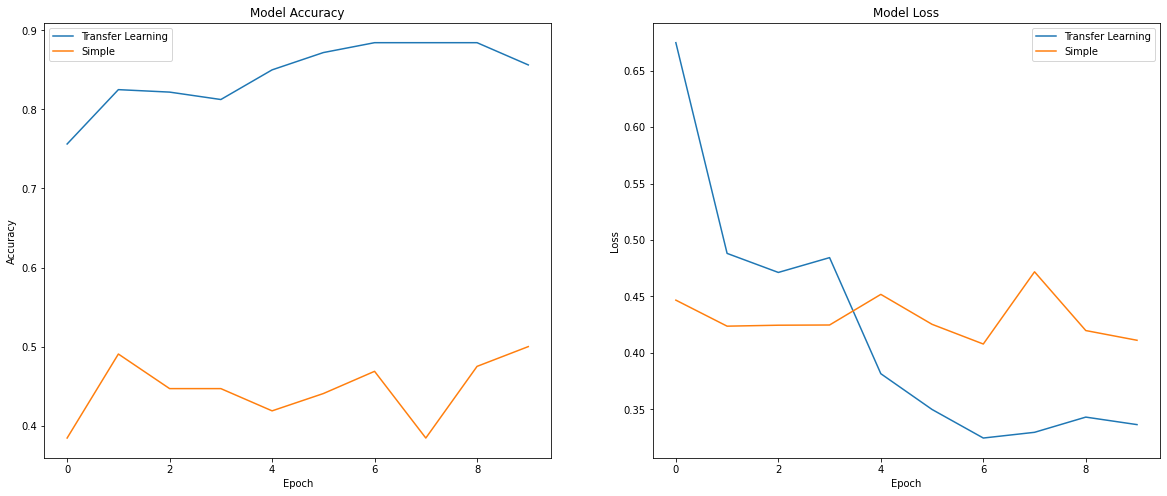

In [30]:
# Accuracy Plot
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes[0].plot(model_with_TL.history['val_accuracy'])
axes[0].plot(model_with_aug.history['val_accuracy'])
axes[0].set(title = 'Model Accuracy', ylabel = 'Accuracy', xlabel='Epoch')
axes[0].legend(['Transfer Learning', 'Simple'], loc='upper left')

# Loss Plot
axes[1].plot(model_with_TL.history['val_loss'])
axes[1].plot(model_with_aug.history['val_loss'])
axes[1].set(title='Model Loss', ylabel='Loss',xlabel='Epoch')
axes[1].legend(['Transfer Learning', 'Simple'], loc='upper right')
plt.show()